How to treat with MRI (.nii) volumes
=
*******

**<div itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-5567-801X" href="https://orcid.org/0000-0001-5567-801X" target="orcid.widget" rel="me noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-left:0em;"  alt="ORCID iD icon">Adrián Arnaiz-Rodríguez</a></div>**

MRI volumes are 3D representations of brain, so they will have 3 dimensions, heigth, width and depth (all the slices).
**NIfTI1** format images.

In [1]:
import nibabel as nib
import glob
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

**List all the files from IXI T1 dataset**

In [2]:
files = glob.glob('../IXI-T1/*.gz')
len(files), files[0]

(581, '../IXI-T1\\IXI002-Guys-0828-T1.nii.gz')

**Load one example volume** and serach through it propierties

In [9]:
vol = nib.load(files[0])
type(vol)

nibabel.nifti1.Nifti1Image

In [4]:
h = vol.header
print(h)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.9375    0.9375    1.199997  0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.468175
quatern_c       : -0.5299171
quatern_d       : -0.468175
qoffset_x       : -88.63989
qoffset_y       : 116.

In [5]:
print('Shape:',h.get_data_shape())
print('Voxel sizes in millimeters:', h.get_zooms())
print('Type:', h.get_data_dtype())

Shape: (256, 256, 150)
Voxel sizes in millimeters: (0.9375, 0.9375, 1.199997)
Type: int16


**Convert from Nifti1 to numpy array**

In [6]:
#img_array = np.asanyarray(img.dataobj)
vol_array = vol.get_fdata()
type(vol_array), vol_array.dtype, vol_array.shape

(numpy.ndarray, dtype('float64'), (256, 256, 150))

**Slicing**

In [7]:
#img_array = np.asanyarray(img.dataobj)
vol_cropped_array = vol.slicer[:,:,30:120].get_fdata()
type(vol_cropped_array), vol_cropped_array.dtype, vol_cropped_array.shape

(numpy.ndarray, dtype('float64'), (256, 256, 90))

**Inspect all images sizes**

In [8]:
dict_size = dict()
dict_size[0] = dict()
dict_size[1] = dict()
dict_size[2] = dict()

for file in files:
    sh = nib.load(file).get_fdata().shape
    
    dict_size[0][sh[0]] = 1 + dict_size[0].get(sh[0], 0)
    dict_size[1][sh[1]] = 1 + dict_size[1].get(sh[1], 0)
    dict_size[2][sh[2]] = 1 + dict_size[2].get(sh[2], 0)

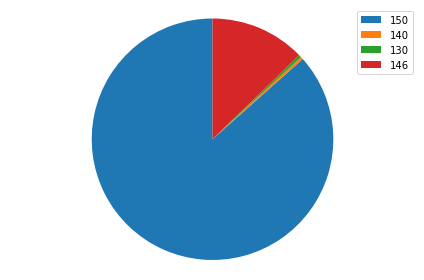

In [28]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(dict_size[2].keys())
sizes = list(dict_size[2].values())
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

**Show 2D slices from volumes**

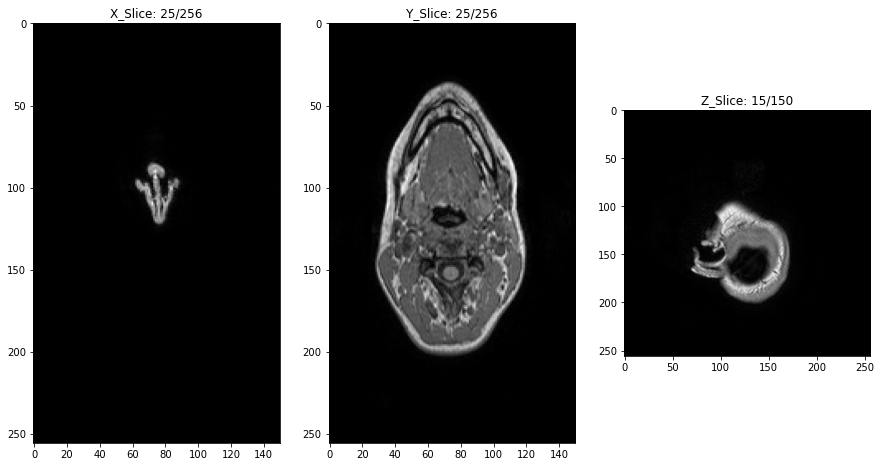

In [18]:
def draw_volume(volume = vol, percentage = 0.5):
    plt.figure(figsize=[15,15])
    
    if isinstance(volume, str):
        volume = nib.load(volume).get_fdata()
    
    i_x = int(np.floor(volume.shape[0]*percentage))
    i_y = int(np.floor(volume.shape[1]*percentage))
    i_z = int(np.floor(volume.shape[2]*percentage))
    
    
    '''slice_x = volume.slicer[i_x:i_x+1,:,:].get_fdata()
    slice_y = volume.slicer[:,i_y:i_y+1,:].get_fdata()
    slice_z = volume.slicer[:,:,i_z:i_z+1].get_fdata()'''
    
    slice_x = volume[i_x, :, :]
    slice_y = volume[:, i_y, :]
    slice_z = volume[:, :, i_z]
    

    plt.subplot(131)
    plt.imshow(slice_x, cmap='gray')
    plt.title('X_Slice: {}/{}'.format(i_x, volume.shape[0]))

    plt.subplot(132)
    plt.imshow(slice_y, cmap='gray')
    plt.title('Y_Slice: {}/{}'.format(i_y, volume.shape[1]))

    plt.subplot(133)
    plt.imshow(slice_z, cmap='gray')
    plt.title('Z_Slice: {}/{}'.format(i_z, volume.shape[2]))

    plt.show()

draw_volume(files[0],0.1)

In [19]:
from ipywidgets import interact_manual , FloatSlider


interact_manual(draw_volume,
         volume = files,
         percentage = FloatSlider(min=0, max=0.999, step=0.005),
        );

interactive(children=(Dropdown(description='volume', options=('../IXI-T1\\IXI002-Guys-0828-T1.nii.gz', '../IXI…

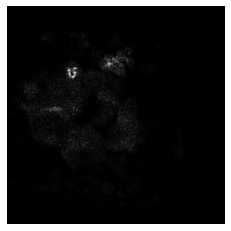

In [43]:
def show_animation(train=True):
    images = nib.load(files[0]).get_fdata()
    images = np.moveaxis(images, 2,0)
    fig = plt.figure()
    ims = list()
    for image in images:
        img = plt.imshow(image,cmap='gray',animated=True)
        plt.axis('off')
        ims.append([img])
    ani = animation.ArtistAnimation(fig,ims,interval=100,blit=False,repeat_delay=1000)
    return ani

ani = show_animation()

In [44]:
HTML(ani.to_jshtml())

*Adrián Arnaiz Rodríguez*